# Atividade 03
---

In [1]:
from Class.AnaliseSistaisSistemas import AnaliseSinaisESistemas
import heartpy as hp
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import mne
import pandas as pd

Text(0, 0.5, 'Amplitude')

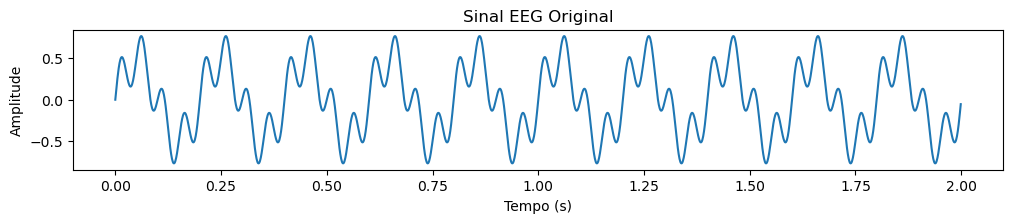

In [2]:
# Parâmetros do sinal
fs = 1000  # Taxa de amostragem em Hz
t = np.arange(0, 2, 1/fs)  # Vetor de tempo de 0 a 2 segundos

# Frequências do sinal
f1 = 5  # Frequência 1 em Hz
f2 = 20  # Frequência 2 em Hz

# Sinal EEG de exemplo (combinação de duas frequências)


sinal = 0.5 * np.sin(2 * np.pi * f1 * t) + 0.3 * np.sin(2 * np.pi * f2 * t)

# Plotar o sinal original
plt.figure(figsize=(12, 4))
plt.subplot(211)
plt.plot(t, sinal)
plt.title('Sinal EEG Original')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')


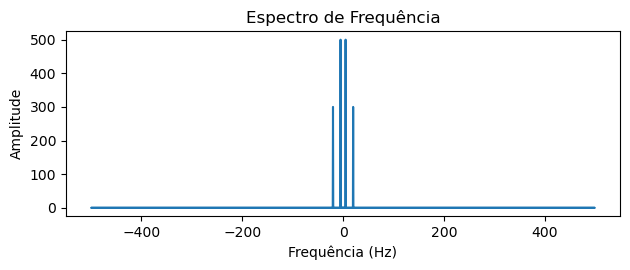

In [3]:
# Calcular a FFT do sinal
frequencias = np.fft.fftfreq(len(t), 1/fs)
espectro = np.abs(np.fft.fft(sinal))

# Plotar o espectro de frequência
plt.subplot(212)
plt.plot(frequencias, espectro)
plt.title('Espectro de Frequência')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


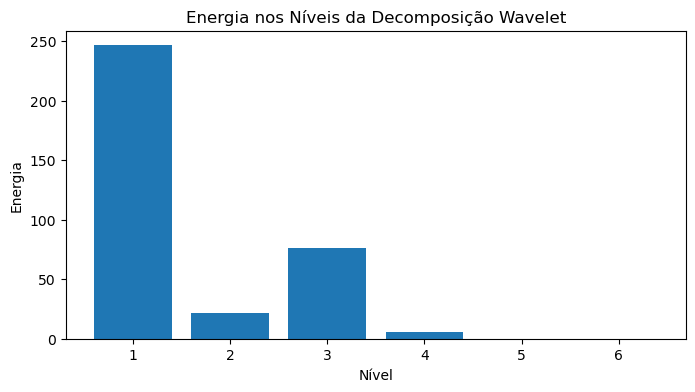

In [4]:
import pywt

# Decomposição em 6 níveis usando a wavelet 'db4'
niveis = 6
coeffs = pywt.wavedec(sinal, 'db4', level=niveis)

# Verificar o número real de níveis retornados
niveis_reais = len(coeffs) - 1  # O último nível é o aproximado

# Calcular a energia em cada nível
energias = [np.sum(np.abs(c) ** 2) for c in coeffs[:-1]]  # Excluir o último nível

# Ajustar o intervalo para corresponder ao número de níveis corretos
niveis_plot = range(1, niveis_reais + 1)

# Plotar as energias em cada nível
plt.figure(figsize=(8, 4))
plt.bar(niveis_plot, energias)
plt.title('Energia nos Níveis da Decomposição Wavelet')
plt.xlabel('Nível')
plt.ylabel('Energia')
plt.show()


## Sumario


- Carregando os Dados com MNE-Python:

Use mne.io.read_raw_edf() para carregar os arquivos .edf.
- Visualização:

Com MNE, você pode usar métodos como raw.plot() para visualizar os dados EEG ao longo do tempo.
mne.viz.plot_topomap() permite visualizar a distribuição espacial da atividade cerebral.

- Filtragem:

Use o método raw.filter() do MNE para filtrar o sinal EEG em bandas de frequência específicas (alpha, beta, etc.).
- Transformada de Fourier:

Utilize a função scipy.signal.welch() para obter a densidade espectral de potência e visualizar as frequências dominantes no sinal.

- Análise no Domínio do Tempo:

Use funções como scipy.signal.find_peaks() para identificar picos no sinal e analisar a atividade cerebral em diferentes pontos no tempo.

- Análise Estatística:

Use métodos estatísticos para comparar a atividade cerebral entre diferentes grupos (por exemplo, controles vs. pacientes com insônia).

 - Analise Espectral

 - DFT para achar h, w e plotar

 - Maximos e minimos relativos e Picos

 - Energia (Parseval) com wavelet e niveis de db6

 - Random Forest para classificar [insonia, bruxismo, tdah]

## 1) Pre Processamento e Limpeza de dados


https://github.com/eric-brandao/codes_proc_de_sinais/tree/master

Canais que vamos utilizar:
F3 ou F4
C3 ou C4
O1 ou O2
Fp1-F3, F3-C3, C3-P3, P3-O1 (se disponíveis)
Fp2-F4, F4-C4, C4-P4, P4-O2 (se disponíveis)


- F4, F3: Localizados na região frontal do cérebro.
- C4, C3: Localizados na região central (ou parietal anterior).
- P4, P3: Localizados na região parietal.
- O1: Localizado na região occipital esquerda.

In [5]:
analise = AnaliseSinaisESistemas()

In [6]:
# Tratando os arquivos TXT e EDF

canais_EEG = ['F3','F4','C3','C4','O1','O2','A1','A2','Fp1-F3','F3-C3','C3-P3','P3-O1','Fp2-F4','F4-C4','C4-P4','P4-02']
canais =  ['F3','F4','C3','C4']

diretorio = "./dataset sleep EEG/"  

arquivos_txt = analise.localizar_arquivos_txt(diretorio)
print("Arquivos TXT:", arquivos_txt)

arquivos_edf = analise.localizar_arquivos_edf(diretorio)
print("\n\nArquivos EDF:", arquivos_edf)

arquivos_edf[0]

Arquivos TXT: ['n1.txt', 'n3.txt', 'brux1.txt', 'ins3.txt', 'ins7.txt', 'n5.txt', 'ins1.txt', 'narco4.txt', 'narco3.txt', 'ins5.txt', 'narco1.txt', 'n4.txt', 'ins6.txt', 'brux2.txt', 'ins4.txt']


Arquivos EDF: ['ins5.edf', 'ins2.edf', 'ins3.edf', 'brux1.edf', 'ins1.edf', 'brux2.edf', 'ins6.edf', 'narco3.edf', 'ins8.edf', 'ins7.edf', 'narco1.edf', 'n2.edf', 'n1.edf', 'narco4.edf', 'narco2.edf', 'ins4.edf']


'ins5.edf'

Extracting EDF parameters from /home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/SEMESTRES/2023.2/Sinais e Sistemas/ATIVIDADE 03 - EXTENSÃO/dataset sleep EEG/n1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
\Dados do Sinal:  <Info | 8 non-empty values
 bads: []
 ch_names: ROC-LOC, LOC-ROC, F2-F4, F4-C4, C4-P4, P4-O2, F1-F3, F3-C3, ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.3 Hz
 lowpass: 30.0 Hz
 meas_date: 2009-01-01 22:06:03 UTC
 nchan: 21
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>
\Arquivo: ./dataset sleep EEG//n1.edf

Canais presentes no sinal:  ['ROC-LOC', 'LOC-ROC', 'F2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'F1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'C4-A1', 'EMG1-EMG2', 'ECG1-ECG2', 'TERMISTORE', 'TORACE', 'ADDOME', 'Dx1-DX2', 'SX1-SX2', 'Posizione', 'HR', 'SpO2']


<RawEDF | n1.edf, 21 x 17725440 (34620.0 s), ~21 kB, data not loaded>

Using matplotlib as 2D backend.


KeyboardInterrupt: 

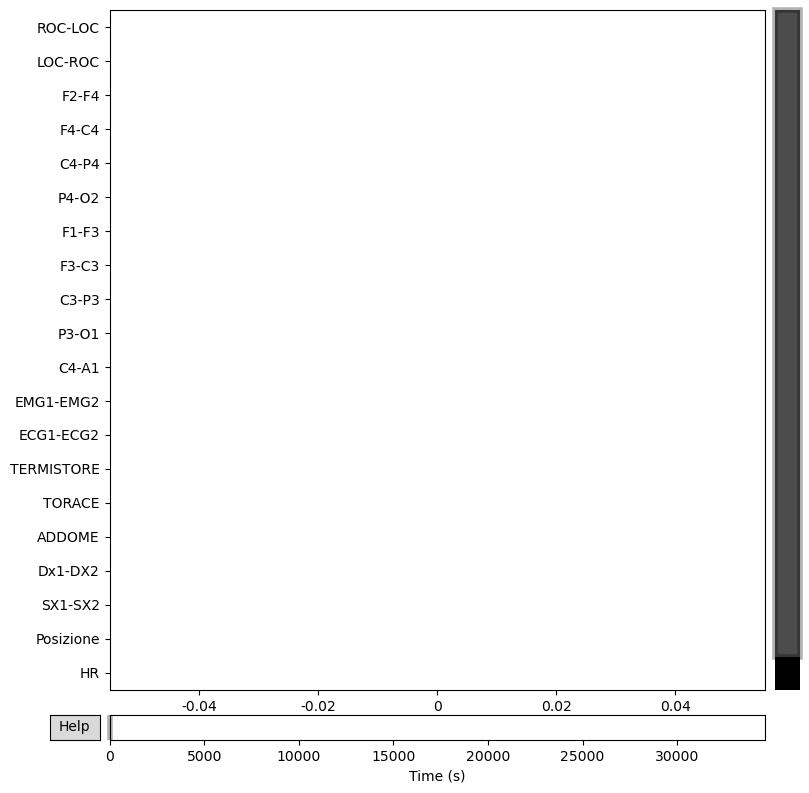

In [7]:
# Lendo as informações e plotando o sinal EEG

dataset = f'{diretorio}/brux1.edf'
files = f'{diretorio}/{arquivos_edf[12]}'

# def carregarSinalEDF(self):
raw = mne.io.read_raw_edf(files)
print('\Dados do Sinal: ',raw.info)
print('\Arquivo:',files)
print('\nCanais presentes no sinal: ',raw.info.ch_names)
display(raw)
raw.plot()

### Pegando os canais que interessa

In [ ]:
print('\nCanais presentes no sinal: ',raw.info.ch_names)

array = []
for item in raw.info.ch_names:
    if item in canais_EEG:
        print(item)
        array.append(item)

        # Selecionar apenas os canais desejados
dados_EEG = raw.copy().pick_channels(array)


print('\n\nCanais EEG:',array)
dados_EEG


Canais presentes no sinal:  ['ROC-LOC', 'LOC-ROC', 'F2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'F1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'C4-A1', 'EMG1-EMG2', 'ECG1-ECG2', 'TERMISTORE', 'TORACE', 'ADDOME', 'Dx1-DX2', 'SX1-SX2', 'Posizione', 'HR', 'SpO2']
F4-C4
C4-P4
F3-C3
C3-P3
P3-O1
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Canais EEG: ['F4-C4', 'C4-P4', 'F3-C3', 'C3-P3', 'P3-O1']


<RawEDF | n1.edf, 5 x 17725440 (34620.0 s), ~9 kB, data not loaded>

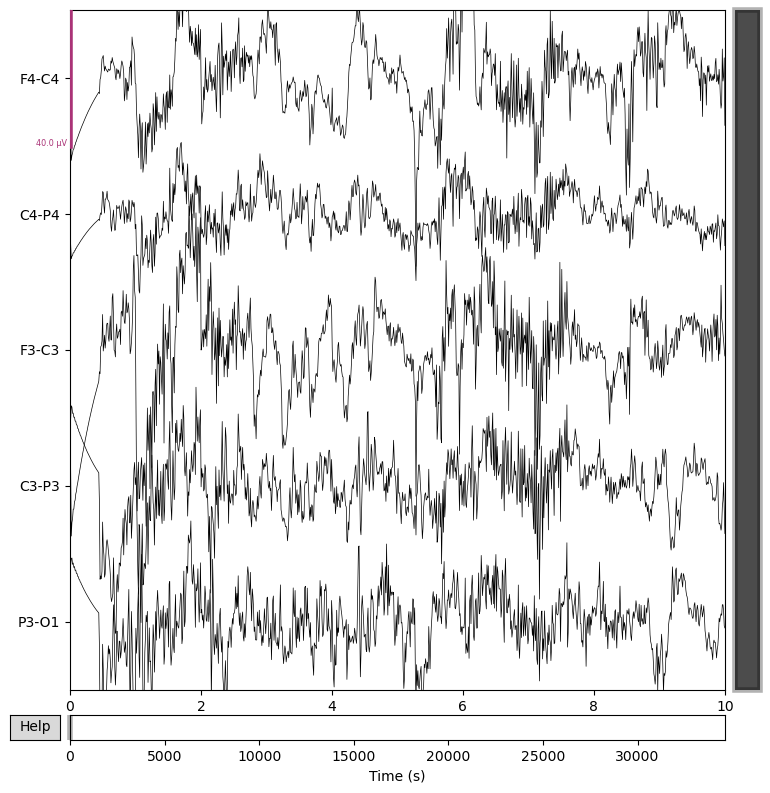

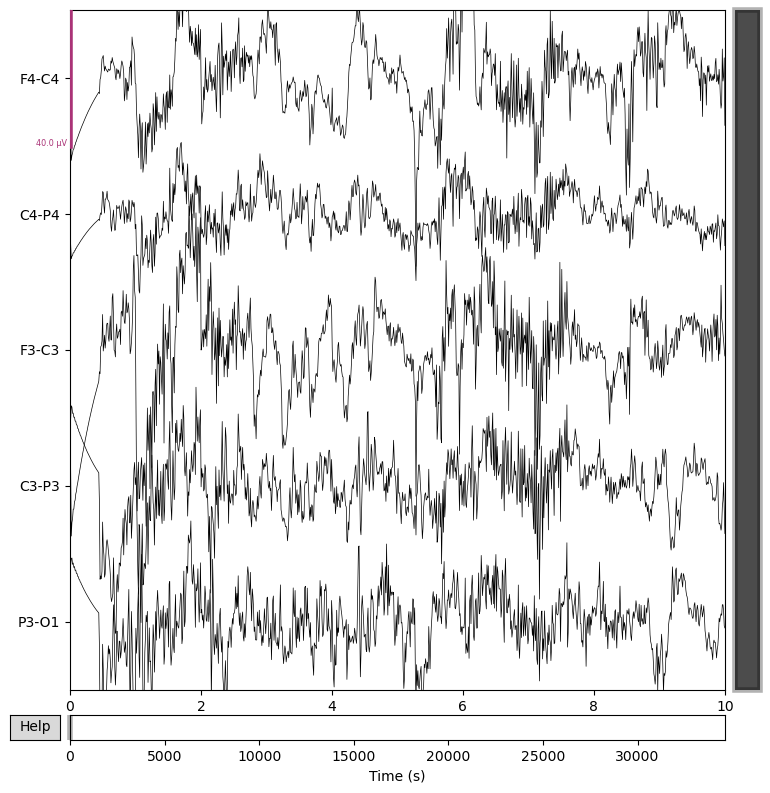

In [ ]:
dados_EEG.plot()

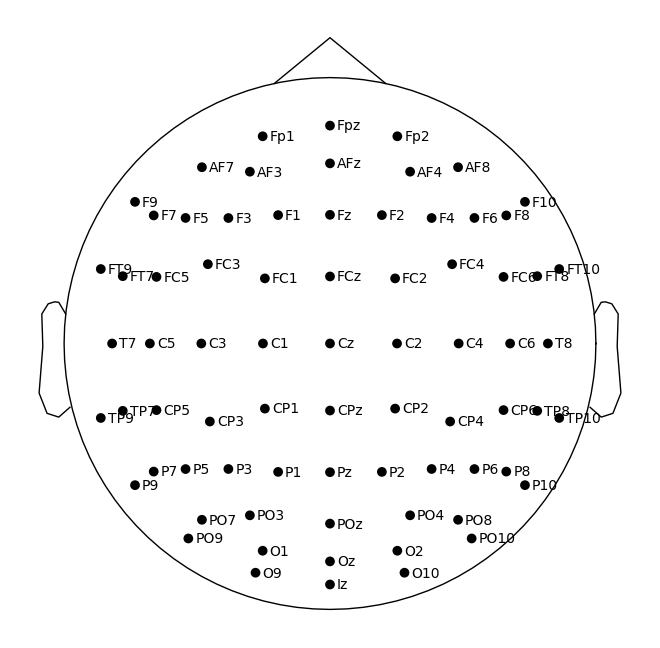

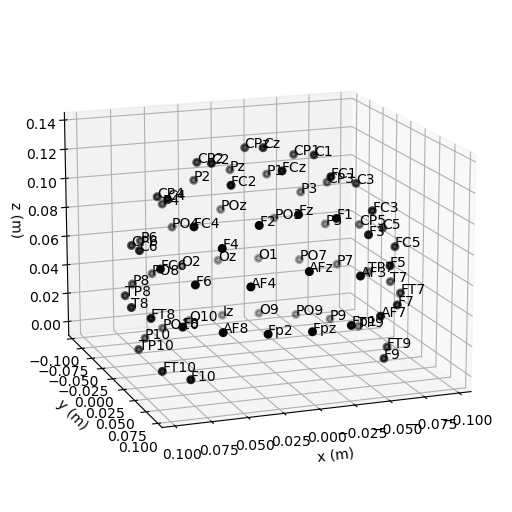

In [ ]:
easycap_montage = mne.channels.make_standard_montage('easycap-M1')
easycap_montage.plot()
fig = easycap_montage.plot(kind='3d', show = False)
fig = fig.gca().view_init(azim = 70, elev = 15)

In [ ]:
sinal = mne.io.read_raw_edf(files ,preload = False)


print(sinal.info)

# Crie canais virtuais referenciados para F3 e F4
sinal.set_eeg_reference(ref_channels=['F3-C3', 'F4-C4'])

canais_desejados = ['F3', 'F4', 'C3', 'C4']

# Crie uma cópia do objeto Raw contendo apenas os canais desejados
raw_selecionado = sinal.copy().pick_channels(canais_desejados)


raw_selecionado.plot_sensors(kind='topomap', show_names=True)


Extracting EDF parameters from /home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/SEMESTRES/2023.2/Sinais e Sistemas/ATIVIDADE 03 - EXTENSÃO/dataset sleep EEG/n1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<Info | 8 non-empty values
 bads: []
 ch_names: ROC-LOC, LOC-ROC, F2-F4, F4-C4, C4-P4, P4-O2, F1-F3, F3-C3, ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.3 Hz
 lowpass: 30.0 Hz
 meas_date: 2009-01-01 22:06:03 UTC
 nchan: 21
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


RuntimeError: By default, MNE does not load data into main memory to conserve resources. Applying a reference requires raw data to be loaded. Use preload=True (or string) in the constructor or raw.load_data().

In [ ]:
mne.viz.plot_sensors(dados_EEG.info,kind='topomap',ch_type = 'all')

RuntimeError: No valid channel positions found

In [ ]:
# Aplique a ICA para remover artefatos
ica = mne.preprocessing.ICA(n_components=5, random_state=97, max_iter=800)
ica.fit(dados_EEG)
raw_corrected = dados_EEG.copy()
ica.apply(raw_corrected)


# Plot os componentes independentes em um mapa topográfico
ica.plot_components()

# Plot os dados EEG corrigidos após a remoção dos artefatos
raw_corrected.plot()

ica.plot_properties(dados_EEG, picks = ica.exclude)

Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by number: 5 components
Fitting ICA took 233.8s.
Applying ICA to Raw instance


RuntimeError: By default, MNE does not load data into main memory to conserve resources. ica.apply requires raw data to be loaded. Use preload=True (or string) in the constructor or raw.load_data().

## Tentativa

In [ ]:

# Selecione apenas os canais EEG
eeg_channels = mne.pick_types(dados_EEG.info, eeg=True)

# Crie um layout 10-20 (ou outro layout apropriado)
layout = mne.channels.make_standard_montage('standard_1020')

print(dados_EEG.info)

# Aplique o layout aos canais EEG
dados_EEG.set_montage('standard_1020')

# Agora, você pode plotar os sensores EEG com nomes
dados_EEG.plot_sensors(kind='topomap', show_names=True, ch_type='eeg')


<Info | 8 non-empty values
 bads: []
 ch_names: F4-C4, C4-P4, F3-C3, C3-P3, P3-O1
 chs: 5 EEG
 custom_ref_applied: False
 highpass: 0.3 Hz
 lowpass: 30.0 Hz
 meas_date: 2009-01-01 22:06:03 UTC
 nchan: 5
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>


ValueError: DigMontage is only a subset of info. There are 5 channel positions not present in the DigMontage. The channels missing from the montage are:

['F4-C4', 'C4-P4', 'F3-C3', 'C3-P3', 'P3-O1'].

Consider using inst.rename_channels to match the montage nomenclature, or inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.

docs

In [ ]:
##### Removendo os canais que nao serao utilizados
ch_names = ['SystemTimestamp', 'Tilt X', 'Tilt Y', 'Tilt Z', 'ESUTimestamp', 'ECG']
#raw.drop_channels(ch_names, on_missing='raise')


##### Inserindo a montagem do sistema 10-20 no arquivo de eeg
easycap_montage = mne.channels.make_standard_montage("easycap-M1")
dados_EEG.set_montage(easycap_montage)

ValueError: DigMontage is only a subset of info. There are 5 channel positions not present in the DigMontage. The channels missing from the montage are:

['F4-C4', 'C4-P4', 'F3-C3', 'C3-P3', 'P3-O1'].

Consider using inst.rename_channels to match the montage nomenclature, or inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.

In [ ]:
# Gerar o espectro - 4 a 40 Hz é uma boa alterativa
espectro  = raw.compute_psd(method='multitaper', fmin=1, fmax=40)
print(espectro)

    Using multitaper spectrum estimation with 7 DPSS windows
<Power Spectrum (from Raw, multitaper method) | 5 channels × 1246321 freqs, 4.0-40.0 Hz>


In [ ]:
bandas_escolhidas = {'Theta (4-8 Hz)': (4, 8),
         'Alpha (8-12 Hz)': (8, 12), 'Beta (12-30 Hz)': (12, 30),
         'Gamma (30-45 Hz)': (30, 45)}

espectro.plot_topomap(bands=bandas_escolhidas, agg_fun=np.median)

RuntimeError: No digitization points found.

## Ondas e frequencias do Cerebro Humano

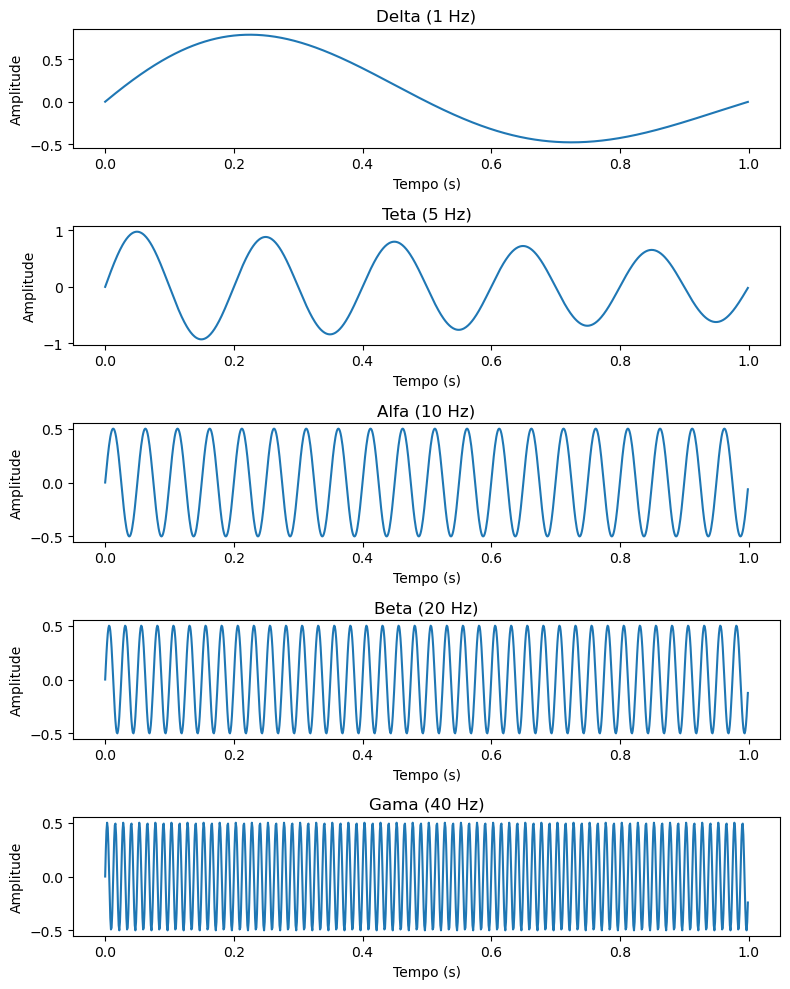

In [ ]:

# Função para gerar uma onda com frequência e nome específicos
def gerar_onda(frequencia, nome):
    tempo = np.linspace(0, 1, 1000, endpoint=False)  # Tempo de 0 a 1 segundo
    if nome == 'Delta':
        onda = np.sin(2 * np.pi * frequencia * tempo) * np.exp(-tempo)
    elif nome == 'Teta':
        onda = np.sin(2 * np.pi * frequencia * tempo) * np.exp(-tempo / 2)
    elif nome == 'Alfa':
        onda = np.sin(2 * np.pi * frequencia * tempo) * np.cos(2 * np.pi * 10 * tempo)
    elif nome == 'Beta':
        onda = np.sin(2 * np.pi * frequencia * tempo) * np.cos(2 * np.pi * 20 * tempo)
    elif nome == 'Gama':
        onda = np.sin(2 * np.pi * frequencia * tempo) * np.cos(2 * np.pi * 40 * tempo)
    return tempo, onda

# Lista de frequências e nomes das ondas
frequencias = [1, 5, 10, 20, 40]
nomes = ['Delta', 'Teta', 'Alfa', 'Beta', 'Gama']

# Gerar e plotar as ondas
fig, axs = plt.subplots(5, figsize=(8, 10))
for i, (freq, nome) in enumerate(zip(frequencias, nomes)):
    tempo, onda = gerar_onda(freq, nome)
    axs[i].plot(tempo, onda)
    axs[i].set_title(f'{nome} ({freq} Hz)')
    axs[i].set_xlabel('Tempo (s)')
    axs[i].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()


## 2) Análise de Dados:

Os dados processados são analisados para identificar as frequências das ondas cerebrais, como ondas alfa, beta, delta, etc.

Análise de Dados Cerebrais: Pode oferecer ferramentas ou algoritmos para analisar dados EEG e extrair informações significativas, como detecção de padrões, identificação de estados mentais, etc.